In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Boston housing price prediction ml project

# The Steps involved in soliving a problem with machine learning techniqe
1.Data Preprocessing 

2.Define Error

3.split the data into two part: training and test data

4.Train the model this step 'learning' the largest function from the givan training set. Choose the appropriate 

machine learning algorithm for problem. train it on the data and test using test data set.

5.Prediction: Obtain the prediction values on givan input and visualize it.

In [3]:
#step 1. Data Preprocessing

#load the dataset
boston=load_boston()
#discription of boston dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#put the boston data into pandas Dataframe
features=pd.DataFrame(boston.data, columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
#Store the data into column to another dataframe called Target
target=pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
target.min()

target    5.0
dtype: float64

In [7]:
target.max()

target    50.0
dtype: float64

In [8]:
#concate feature and target into a single Dataframe
# axis=1 for concatinate column wise
df=pd.concat([features,target], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
# use round(dacimals=2) to pricise two decimals number
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


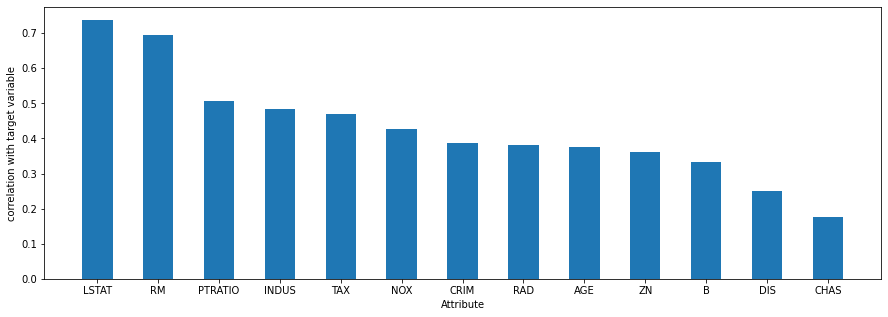

In [10]:
#Data Visualization

#Calculate correlation between every column on the data
corr=df.corr('pearson')

#Take absolute value of correlation
corrs=[abs(corr[attr]['target']) for attr in list(features)]

#combining correlation value and feature value
l=list(zip(corrs, list(features)))

#Sort the list of pair into reverse/decending order
#with the correlation value as the key for sorting
l.sort(key=lambda x : x[0], reverse=True)

#zip(*l): Take Unzip pair to two  list that looks like [[a,b,c][d,e,f][i,j,k]]
#and returns like [[a,d,i][b,e,j][c,j,k]]
corr,labels=list(zip((*l)))

#plot correlation with respect to terget variabal as bar graph
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corr, width=0.5)
plt.xlabel('Attribute')
plt.ylabel('correlation with target variable')
plt.xticks(index,labels)
plt.show()


In [16]:
# Normalization of data to make the value lie in common form 
X=df['LSTAT'].values

Y=df['target'].values

In [17]:
#Before Normalization
print(Y[:5])


[24.  21.6 34.7 33.4 36.2]


In [18]:
# Creating an instance of target object and then using fit_transform to resape the vertical data
#normalize the data
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:-1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:-1]

In [19]:
#After Normalization
print(Y[:5])


[[0.42222222]
 [0.36888889]
 [0.66      ]
 [0.63111111]
 [0.69333333]]


# Step:2 Data Error

# Step:3.split the data into two part: training and test data

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.20)

In [21]:
xtrain.shape,ytrain.shape, xtest.shape,ytest.shape

((404, 1), (404, 1), (101, 1), (101, 1))

# Step 4 Build The Model

In [22]:
#now we are going to defining the function to training our model on the dataset
# FIND MEAN SQURE ERROR( Three fuction :ERROR, UPDATE AND GREDIENT_DECENT)
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*N) 

In [23]:
#Write a waigth Update Function
def update(m,x,c,t, learning_rate):
    grad_m=sum(2*((m*x+c)-t)*x)
    grad_c=sum(2*((m*x+c)-t))
    m=m-grad_m*learning_rate
    c=c-grad_c*learning_rate
    return m, c


In [24]:
def gradient_decent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m  #initialize m
    c=init_c  #initialize c
    error_values= list() #list of historical error values
    mc_values= list()  #list of historical values of m,c
    for i in range(iterations):
        e=error(m,x,c,t)
        print("iterations: " +str(i)+ " , Error: "+str(e))
        if e<error_threshold:
            print('Error less then threshold .Therefor stop gradian decent')
            break
        error_values.append(e)
        m, c=update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

# Training

In [25]:
%%time
init_m=0
init_c=0
learning_rate=0.001
iterations=250
error_threshold=0.001
m,c,error_values,mc_values=gradient_decent(init_m,init_c,
                                           xtrain,ytrain,
                                           learning_rate,
                                           iterations,
                                           error_threshold)

iterations: 0 , Error: [0.09728181]
iterations: 1 , Error: [0.02563095]
iterations: 2 , Error: [0.02387066]
iterations: 3 , Error: [0.0230478]
iterations: 4 , Error: [0.02228304]
iterations: 5 , Error: [0.02156253]
iterations: 6 , Error: [0.02088359]
iterations: 7 , Error: [0.02024382]
iterations: 8 , Error: [0.01964095]
iterations: 9 , Error: [0.01907287]
iterations: 10 , Error: [0.01853755]
iterations: 11 , Error: [0.01803312]
iterations: 12 , Error: [0.01755779]
iterations: 13 , Error: [0.01710988]
iterations: 14 , Error: [0.0166878]
iterations: 15 , Error: [0.01629008]
iterations: 16 , Error: [0.0159153]
iterations: 17 , Error: [0.01556215]
iterations: 18 , Error: [0.01522936]
iterations: 19 , Error: [0.01491578]
iterations: 20 , Error: [0.01462028]
iterations: 21 , Error: [0.01434183]
iterations: 22 , Error: [0.01407945]
iterations: 23 , Error: [0.0138322]
iterations: 24 , Error: [0.01359921]
iterations: 25 , Error: [0.01337967]
iterations: 26 , Error: [0.01317279]
iterations: 27 

In [26]:
len(error_values)

250

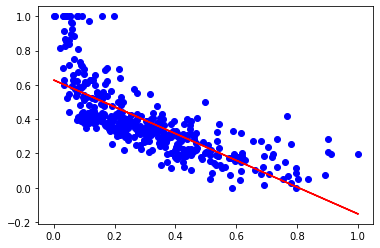

In [27]:
#ploting points in blue color
plt.scatter(xtrain,ytrain, color='b')
#ploting the regression line Evaluated by the model in red
plt.plot(xtrain,(m*xtrain+c),color='r')


Text(0.5, 0, 'Iterations')

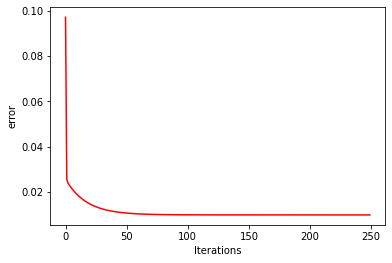

In [28]:
plt.plot(np.arange(len(error_values)),error_values,color='r')
plt.ylabel('error')
plt.xlabel('Iterations')

In [29]:
#As the number of interations increases, changes in the line are less noticable
# In Order to reduse processing time fot the animation, It is advise to choose small value of iterations

mc_values_anim= mc_values[0:250:5] # now the slicing mc_values list by 
                         :          #the factor of 5 for the ease of animation
mc_values_anim

[(array([0.07133409]), array([0.31367111])),
 (array([-0.03566889]), array([0.39055737])),
 (array([-0.13857022]), array([0.42338571])),
 (array([-0.22726691]), array([0.45168172])),
 (array([-0.30371962]), array([0.47607165])),
 (array([-0.36961855]), array([0.49709472])),
 (array([-0.42642058]), array([0.51521569])),
 (array([-0.47538148]), array([0.53083519])),
 (array([-0.51758365]), array([0.54429852])),
 (array([-0.5539601]), array([0.55590333])),
 (array([-0.58531502]), array([0.56590617])),
 (array([-0.61234161]), array([0.57452819])),
 (array([-0.63563737]), array([0.58196])),
 (array([-0.6557173]), array([0.5883659])),
 (array([-0.67302533]), array([0.5938875])),
 (array([-0.6879441]), array([0.59864689])),
 (array([-0.70080344]), array([0.60274927])),
 (array([-0.71188764]), array([0.60628535])),
 (array([-0.72144173]), array([0.6093333])),
 (array([-0.72967695]), array([0.61196049])),
 (array([-0.73677535]), array([0.61422503])),
 (array([-0.74289387]), array([0.61617695]))

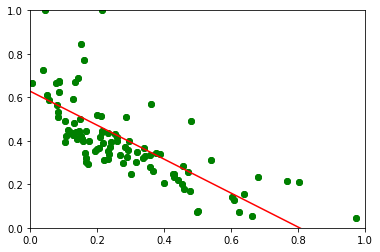

In [30]:
#initializing the animate window and animate line
fig,ax=plt.subplots()
ln, =plt.plot([],[],'ro-',animated=True)

#initialization function requared by FuncAnimation object
def init():
    plt.scatter(xtest,ytest, color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,

#frame updation function for FuncAnimation Object
def update_frame(frame):
    m,x=mc_values_anim[frame]
    x1,y1= -0.5, m*-0.5+c
    x2,y2= 1.5, m*1.5+c
    ln.set_data([x1,x2],[y1,y2])
    return ln,

anim=FuncAnimation(fig,update_frame,frames=range(len(mc_values_anim)),init_func=init,blit=True)
HTML(anim.to_html5_video()) 

In [31]:
print(m)
print(c)

[-0.78056875]
[0.62819599]


# Step:5 Prediction And Evaluation

In [32]:
#housing price predicted using trained model
predicted=(m*xtest)+c

In [33]:
#mean squared error fot the values predicted by the tained model
mean_squared_error(ytest,predicted) # this function is in scikitlearn library

0.015799667017534515

In [34]:
#dataframe of input ,expected output and predicted output values
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted'])
p.head()

,x,target_y,predicted
0,[0.043874172185430466],[1.0],[0.5939491804373938]
1,[0.4288079470198675],[0.2466666666666667],[0.2934819050721498]
2,[0.11975717439293598],[0.44],[0.5347172802757866]
3,[0.2152317880794702],[1.0],[0.46019278043609163]
4,[0.4586092715231788],[0.18],[0.2702199224632276]


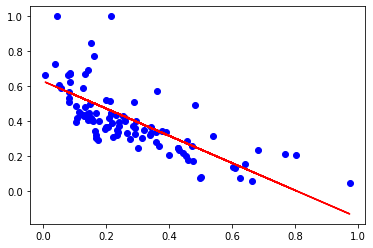

In [35]:
#plotting the datapoints in the testing dataset in blue
plt.scatter(xtest,ytest,color='b')
#plotting the predicted values by the model in red
plt.plot(xtest,predicted,color='r')

In [36]:
#To Get the predictions in their original units , we need to renormalize

predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predicted_scaled=y_scaler.inverse_transform(predicted)


#remove extra dimension

xtest_scaled=xtest_scaled[:-1]
ytest_scaled=ytest_scaled[:-1]
predicted_scaled=predicted_scaled[:-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,[3.32],[50.0],[31.72771311968272]
1,[17.27],[16.1],[18.20668572824674]
2,[6.07],[24.799999999999997],[29.062277612410398]
3,[9.53],[50.0],[25.70867511962412]
4,[18.35],[13.1],[17.159896510845243]
